To most investors, short selling is a shadowy, mysterious corner of the markets.  Many do not make use of shorting - and I suspect a majority don't understand how to glean insights from trends in short selling activity.  

Over the past several years, I've traded short about as often as long and have consequently learned a great deal about the subtle differences between the long and short sides of the market.  I've also become intimately familiar with the datasets relevant to short selling.  

In this post, I'm going to explore some of these short selling datasets to identify ways in which quantitative traders can use them to create a powerful additional source of alpha.  While I focus on the systematic quantitative approach, discretionary traders can also apply the same insights as part of their decision-making processes.  

### Brief Primer on Short Selling Data
I'm assuming readers of this post have a good understanding of the concepts and basic mechanics of short-selling - but not necessarily of the types of data available regarding short selling data.

<img src="images/Short-Sales.jpg" width="600">

__Short Interest -__ I suspect that most readers will first think about short interest data, which is widely (and freely) reported by [exchanges](https://www.nasdaq.com/symbol/tsla/short-interest), in the [Wall Street Journal](https://quotes.wsj.com/TSLA), and elsewhere.  It represents a view about what _has happened_ in the short-selling market, as presented by how many shares are currently being loaned out to short-sellers, who have presumably _already sold short_ this borrowed inventory.  It is typically presented in terms of raw shares short, and often in terms of "percent of float" (what percent of total traded float is on borrow) and sometimes in terms of "days to cover" - a ratio of borrowed share quantity to daily average volume.  

This data is released twice monthly, with several days' lag.  

__Short Borrow and Loan Market Data -__ Less often thought about is the _current cost and availability_ to borrow shares for short sale.  Prior (or soon after) selling short, traders are required find a current shareholder who is willing to loan out their shares to the would-be short seller in exchange for a fee.  While there is no single, centralized marketplace for this owner-to-shortseller exchange, there does exist a network of broker/dealers who collectively define how many shares are available for borrow - and at what cost.  

Costs can range from virtually nil to exhorbanent (hundreds of basis points per _week_), and can change dramatically in the course of a day.  Shares available can also vary greatly.  At any point in time, a significant number of stocks have zero shares available for (new) short sale transactions, while others have millions of shares available to borrow. 

Laws of supply and demand being what they are, it's typically (but not always) the case that shares with few willing lenders and many motivated borrowers will have higher lending costs than those with many willing lenders and/or few willing borrowers.  Therefore, this data can give a read into how much demand exists amongst short-sellers to go short a given name.  It also indicates how much pain (i.e., cost) existing short sellers may be experiencing to maintain their already short-sold positions.  

This data is typically provided by broker/dealers daily (or multiple times per day), or from data providers like [IHS Markit](https://ihsmarkit.com/products/securities-finance.html).

There are two other sets of short-sale data which I will not explore in depth here, though may do so in a future post if of interest:

__RegSHO Short Volume -__ As part of the post-GFC RegSHO, FINRA has been collecting and reporting data on _transaction volumes_ of short sales since 2010 (if I recall correctly).  This dataset allocates daily (or intraday) volume into cases where the seller of the transaction was already long the security (a natural seller) vs. a short seller who did not hold shares, based on flags added to order tickets by broker/dealers.  This data can be confusing because a huge volume of transactions appear to be short sales only because a market maker sold shares to a willing buyer and was technically short-selling, if only for a few minutes or hours.  

__Failure to Deliver -__ The SEC has reported [fails-to-deliver data](https://www.sec.gov/data/foiadocsfailsdatahtm) since, I believe, the early days of RegNMS.  This data reports instances of sellers who failed to deliver the necessary shares by settlement date via the National Securities Clearing Corp (NSCC).  While this is not exclusively due to short sellers, it's frequently caused by short sellers who engaged in short sale transactions on the belief that they _would be_ able to borrow shares, but couldn't.  It's reasonable to assume that this could tell us something about short seller behaviors (and their risk of involuntary buy-ins). 


### Hypotheses
The reason I'm interested in this dataset is because there are multiple equally plausible - but contradictory - views on how to interpret short selling data.  I'd like to separate fact from fiction.     

One school of thought is that, as very savvy and active market participants, short sellers are "smart money" and should be followed.  In other words, if a stock has an unusually high short interest, that suggests well-informed short sellers have found causes to be bearish and wise investors should steer clear of owning it.  Short sellers like Jim Chanos have made fantastic wealth by identifying frauds (Enron, Lumber Liquidators, Valeant to name a few).  Short sellers, as a whole, do deep research and place their bets carefully.  

The opposing school of thoguht is that stocks with high short interest have a large built-in base of future "obligated buyers", since every short seller will eventually have to buy back those shares.  This can be viewed as a bullish signal since a short seller being forced to buy in at whatever price has a tendency to spike prices (often called a "short squeeze").  

I'm generally inclined towards the latter view, but want to explore this systematically.  In specific, I'm interested in the following hypotheses:
* __High short interest__ stocks tend to __rise__ in price in the upcoming days and weeks
* Stocks with __upward trending short interest__ levels tend to __decline__ in price in the upcoming days and weeks
* Stocks with __expensive borrow fees__ tend to __rise__ in price (especially if already heavily sold short)
* Stocks with __rising borrow fees__ tend to __rise__ in price (especially if already expensive)
* Stocks with __low borrow availability__ tend to __rise__ in price (especially if already heavily sold short)
* Stocks with __declining or vanished borrow availability__ tend to __rise__ in price (especially if already heavily sold short)


### Approach
In this post I'll look at short interest and short borrow/loan marketplace data for the Russell 2000 during the year 2016.  I've chosen R2K because, in my experience, smaller cap names have more variability with regard to short interest, availability, and fee rates.  I've chosen 2016 at random but wanted to reserve the option to validate out of sample on later data (2017 or 2018).  I've sourced the data from proprietary databases I've maintained over the past several years for trading and backtesting purposes.

I am most interested in short-term movement of prices, as measured in 1,2,5,10, or 20 trading day look-aheads.  For short borrow/loan data, which is available several times per day, I will look more carefully at 1/2/5 day ahead performance.  Short interest data, which is reported twice monthly by exchanges like NYSE and NASDAQ, makes more sense to consider on a 10 or 20 day timeframe.  

An important note regarding semi-monthly short interest data is that it is indexed to _release date_ rather than effective date.  In other words, exchanges delay the release of short interest for the 15th of the month until the 25th of the month or thereabouts.  For this analysis, data which was measured on the 15th but not reported until the 25th is indexed to the 25th - when it would have been available to us.  

As usual, the post shares used to execute this analysis in the interest of transparency and education.  If you'd like to experiment with the code, _you can download the source notebook for this post by right-clicking on the below button and choosing "save link as"_ 

<a style="text-align: center;" href="https://github.com/convergenceIM/alpha-scientist/blob/master/content/shorting_as_signal.ipynb"><img src="images/button_ipynb-notebook.png" title="download ipynb" /></a>

_Note that the data used is from my proprietary databases so replicating code will require that you have access to short interest and short borrow/loan marketplace datasets.  Feel free to contact me directly if seeking guidance on where to look._  


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import seaborn as sns

from IPython.core.display import HTML, Image

path_to_data = 'E:/Dropbox/Dropbox/alphascientist/short_data/'

## Load and Prepare Data
First, of course, we need data.  I will load four sets:
1. `Price` & `Volume` - self explanatory
2. `Outcomes` - the _forward_ looking price movement for 1,2,5,10,20,50 days in the future.  This can be engineered from price data, which I've already done in pre-processing.   
3. `short_interest` - the semi-monthly reports from exchanges regarding the total open short interest (and related values) for each security.  
4. `sbl` - the short borrow/loan marketplace data, which shows how many shares (and at what fee rate) you could have entered a _new_ short transaction as of any given date.

For each, I'll load the data, cast types, and set consistent indices.  


### Price and Returns Data

In [3]:
# gets price (adjusted for splits/divs) and volume data

symbols = list(pd.read_csv(path_to_data + 'Russell_2000_Jan2016.txt').columns)

tmp = pd.read_csv(path_to_data + 'ohlcv_2016.csv')
tmp.date = pd.to_datetime(tmp.date)
tmp = tmp.set_index(['date', 'symbol'])

prices = tmp['close_adj']
volumes = tmp['volume']
avg_volumes = volumes.groupby(
    level='symbol').apply(lambda x: x.rolling(20).mean()).rename('avg_vol')

print(tmp.tail())

                   open   high    low  close   volume  open_adj  high_adj  \
date       symbol                                                           
2018-08-31 ZUMZ    29.8  31.23  29.75  31.15   236800      29.8     31.23   
2018-09-04 ZUMZ    31.9  32.70  30.80  31.25   661500      31.9     32.70   
2018-09-05 ZUMZ    31.3  31.30  29.85  30.10   731000      31.3     31.30   
2018-09-06 ZUMZ    30.1  31.00  29.15  29.15   798900      30.1     31.00   
2018-09-07 ZUMZ    28.6  30.56  27.55  29.20  1038900      28.6     30.56   

                   low_adj  close_adj  volume_adj  
date       symbol                                  
2018-08-31 ZUMZ      29.75      31.15      236800  
2018-09-04 ZUMZ      30.80      31.25      661500  
2018-09-05 ZUMZ      29.85      30.10      731000  
2018-09-06 ZUMZ      29.15      29.15      798900  
2018-09-07 ZUMZ      27.55      29.20     1038900  


In [4]:
## makes "outcomes" dataframe for 1,2,5,10,20 and 50 days forward
# Example: the price_10 for ZUMZ on 12/23 indicates how much the price will change
# in the *next 10 trading days* after 12/23

outcomes = pd.read_csv(path_to_data + 'outcomes_2016.csv')
outcomes.date = pd.to_datetime(outcomes.date)
outcomes = outcomes.set_index(['date', 'symbol'])
print(outcomes.tail())

                    price_1   price_2   price_5  price_10  price_20  price_50
date       symbol                                                            
2016-12-23 ZUMZ    0.004684  0.004684  0.030445 -0.053864 -0.060890 -0.016393
2016-12-27 ZUMZ    0.000000  0.020979  0.060606 -0.079254 -0.090909 -0.142191
2016-12-28 ZUMZ    0.020979  0.018648 -0.039627 -0.086247 -0.121212 -0.174825
2016-12-29 ZUMZ   -0.002283  0.004566 -0.093607 -0.093607 -0.105023 -0.194064
2016-12-30 ZUMZ    0.006865  0.041190 -0.086957 -0.066362 -0.082380 -0.192220


### Short Borrow Loan Data

In [5]:
## Loads dataset of borrow rates and available quantity

sbl = pd.read_csv(path_to_data + 'sbl_2016.csv')
sbl.date = pd.to_datetime(sbl.date)
sbl = sbl.set_index(['date', 'symbol'])
print(sbl.head())

                   fee_rate  available
date       symbol                     
2015-07-01 AAC       2.6250    45000.0
           AAMC      2.6139    35000.0
           AAOI      0.8800   100000.0
           AAON      0.3500  2400000.0
           AAT       0.2500  3500000.0


There are some common sense transformations (normalizations, logs, rate-of-change, etc...) we'll want to consider so I will add those first.  

In [6]:
sbl = sbl.join(avg_volumes)
sbl.avg_vol = sbl.groupby(level='symbol').avg_vol.ffill()  # cleans up weekends

sbl['fee_rate_prior'] = sbl.groupby(level='symbol').fee_rate.shift(1)
sbl['chg_fee_rate'] = sbl.fee_rate - sbl.fee_rate_prior

sbl['fee_rate_log'] = sbl.fee_rate.apply(np.log)
sbl['fee_rate_log_prior'] = sbl.groupby(level='symbol').fee_rate_log.shift(1)
sbl['chg_fee_rate_log'] = sbl.fee_rate_log - sbl.fee_rate_log_prior

sbl['available_log'] = sbl.available.apply(np.log)
sbl['available_log_prior'] = sbl.groupby(level='symbol').available_log.shift(1)
sbl['chg_available_log'] = sbl.available_log - sbl.available_log_prior

## add volume, normalize share counts by avg volume
sbl['available_prior'] = sbl.groupby(level='symbol').available.shift(1)
sbl['chg_available'] = sbl.available - sbl.available_prior

sbl['days_available'] = sbl.available / sbl.avg_vol
sbl['days_available_prior'] = sbl.groupby(
    level='symbol').days_available.shift(1)
sbl['chg_days_available'] = sbl.days_available - sbl.days_available_prior

## Moving averages and ratios to moving avg
sbl['avg_fee_rate'] = sbl.fee_rate.groupby(level='symbol')\
.apply(lambda x: x.rolling(window=100,min_periods=1).mean())
sbl['avg_available'] = sbl.available.groupby(level='symbol')\
.apply(lambda x: x.rolling(window=100,min_periods=1).mean())

sbl['fee_rate_ratio'] = sbl['fee_rate'] - sbl['avg_fee_rate']
sbl['available_ratio'] = sbl['available'] / sbl['avg_available']

## add bins
sbl['fee_rate_bin'] = pd.qcut(
    pd.to_numeric(sbl.fee_rate), labels=False, q=10, duplicates='drop') + 1
sbl['available_bin'] = pd.qcut(
    pd.to_numeric(sbl.available), labels=False, q=10, duplicates='drop') + 1
sbl['days_available_bin'] = pd.qcut(
    pd.to_numeric(sbl.days_available), labels=False, q=10,
    duplicates='drop') + 1
sbl['chg_fee_rate_bin'] = pd.qcut(
    pd.to_numeric(sbl.chg_fee_rate), labels=False, q=10, duplicates='drop') + 1
sbl['chg_available_bin'] = pd.qcut(
    pd.to_numeric(sbl.chg_available), labels=False, q=10,
    duplicates='drop') + 1
sbl['chg_days_available_bin'] = pd.qcut(
    pd.to_numeric(sbl.chg_days_available),
    labels=False,
    q=10,
    duplicates='drop') + 1
sbl['chg_available_log_bin'] = pd.qcut(
    pd.to_numeric(sbl.chg_available_log),
    labels=False,
    q=10,
    duplicates='drop') + 1

sbl['fee_rate_ratio_bin'] = pd.qcut(
    pd.to_numeric(sbl.fee_rate_ratio), labels=False, q=10,
    duplicates='drop') + 1
sbl['available_ratio_bin'] = pd.qcut(
    pd.to_numeric(sbl.available_ratio), labels=False, q=10,
    duplicates='drop') + 1

#shorten to only 2016
sbl = sbl.xs(slice('2016-01-01', '2016-12-31'), level='date', drop_level=False)

# merge with outcomes data (price changes *following* that date)
df1 = outcomes.join(sbl)
print(sbl.tail())

                   fee_rate  available    avg_vol  fee_rate_prior  \
date       symbol                                                   
2016-12-30 ZIOP     13.5825   300000.0  1653290.0         13.6333   
           ZIXI      0.4417  6500000.0   232950.0          0.4514   
           ZLTQ      1.1086   650000.0   624725.0          1.1086   
           ZOES      1.4474   150000.0   403780.0          1.4733   
           ZUMZ      0.8881  1800000.0   554125.0          0.8584   

                   chg_fee_rate  fee_rate_log  fee_rate_log_prior  \
date       symbol                                                   
2016-12-30 ZIOP         -0.0508      2.608782            2.612515   
           ZIXI         -0.0097     -0.817124           -0.795401   
           ZLTQ          0.0000      0.103098            0.103098   
           ZOES         -0.0259      0.369769            0.387505   
           ZUMZ          0.0297     -0.118671           -0.152685   

                   chg_fee_rate_

### Short Interest Data

In [8]:
## Loads semi-monthly short interest data as reported by exchanges
# Note, date shows date reported by exchanges, not the measurement date

short_interest = pd.read_csv(path_to_data + 'short_interest_2016.csv').drop(
    ['monthly_chg', 'dtc'], axis=1)
short_interest.date = pd.to_datetime(short_interest.date)
short_interest = short_interest.set_index(['date', 'symbol'])

print(short_interest.head())

                   short_interest  short_interest_prior  pct_float
date       symbol                                                 
2015-07-10 AAC            2848200             2741200.0      35.47
2015-07-24 AAC            2886900             2848200.0      35.95
2015-08-11 AAC            3184300             2886900.0      37.20
2015-08-25 AAC            3795100             3184300.0      44.34
2015-09-11 AAC            5049400             3795100.0      70.92


In [9]:
## Apply similar transforms to this dataset

## add volume, normalize share counts by avg volume

short_interest = short_interest.join(avg_volumes)
short_interest[
    'days_si'] = short_interest.short_interest / short_interest.avg_vol
short_interest['chg_days_si'] = \
(short_interest.short_interest-short_interest.short_interest_prior)/short_interest.avg_vol
short_interest[
    'si_chg'] = short_interest.short_interest / short_interest.short_interest_prior * 100 - 100

## Moving averages and ratios to moving avg
short_interest['avg_si'] = short_interest.short_interest.groupby(level='symbol')\
.apply(lambda x: x.rolling(window=12,min_periods=1).mean())
short_interest['avg_days_si'] = short_interest.days_si.groupby(level='symbol')\
.apply(lambda x: x.rolling(window=12,min_periods=1).mean())

short_interest['si_ratio'] = short_interest['short_interest'] / short_interest['avg_si']
short_interest['days_si_ratio'] = short_interest['days_si'] / short_interest['avg_days_si']

## add bins
short_interest['pct_float_bin'] = pd.qcut(
    pd.to_numeric(short_interest.pct_float),
    labels=False,
    q=10,
    duplicates='drop') + 1
short_interest['si_chg_bin'] = pd.qcut(
    pd.to_numeric(short_interest.si_chg),
    labels=False,
    q=10,
    duplicates='drop') + 1
short_interest['days_si_bin'] = pd.qcut(
    pd.to_numeric(short_interest.days_si),
    labels=False,
    q=10,
    duplicates='drop') + 1
short_interest['si_ratio_bin'] = pd.qcut(
    pd.to_numeric(short_interest.si_ratio),
    labels=False,
    q=10,
    duplicates='drop') + 1
short_interest['days_si_ratio_bin'] = pd.qcut(
    pd.to_numeric(short_interest.days_si_ratio),
    labels=False,
    q=10,
    duplicates='drop') + 1

#shorten to only 2016
short_interest = short_interest.xs(
    slice('2016-01-01', '2016-12-31'), level='date', drop_level=False)

df2 = short_interest.join(outcomes)

print(short_interest.tail())

                   short_interest  short_interest_prior  pct_float   avg_vol  \
date       symbol                                                              
2016-10-25 ZUMZ           3930400             4003400.0      22.95  595870.0   
2016-11-09 ZUMZ           4462000             3930400.0      26.06  385580.0   
2016-11-25 ZUMZ           4444700             4462000.0      25.96  370970.0   
2016-12-09 ZUMZ           4394800             4444700.0      25.56  473735.0   
2016-12-27 ZUMZ           4634300             4394800.0      25.39  613500.0   

                     days_si  chg_days_si     si_chg        avg_si  \
date       symbol                                                    
2016-10-25 ZUMZ     6.596070    -0.122510  -1.823450  4.534975e+06   
2016-11-09 ZUMZ    11.572177     1.378702  13.525341  4.484375e+06   
2016-11-25 ZUMZ    11.981292    -0.046634  -0.387719  4.440525e+06   
2016-12-09 ZUMZ     9.276916    -0.105333  -1.122685  4.399000e+06   
2016-12-27 ZUMZ    

In [10]:
## merge sbl and short_interest data to evaluate possible interaction effects
#  Fill forward the lower frequency short interest data to every day with borrow/loan data
df3 = df1.join(short_interest.drop(columns='avg_vol')).ffill()

With this data in place, we can test the six hypotheses presented above.  As a first pass, I'll simply look at average forward return (1,2,5,and 10 day) for each binned feature.  It's often the case that taking the means of bins (in this case, quintiles) can be useful in finding valid signals buried within noisy data.    

### #1 - __High short interest__ stocks tend to __rise__ in price in the upcoming days and weeks:  FALSE
The level of short interest can be measured in terms of either (1) days of average volume or (2) percent of float represented by shares short.  Both ways of measuring show the opposite trend predicted by the hypothesis, though `days_si` more strongly.  Stocks with the most significant short interest (decile 10) have significantly worse returns. 


days_si_bin
1.0      2.037879
2.0      3.301690
3.0      4.259834
4.0      5.231689
5.0      6.301242
6.0      7.594622
7.0      9.200751
8.0     11.469077
9.0     15.267379
10.0    87.305335
Name: days_si, dtype: float64


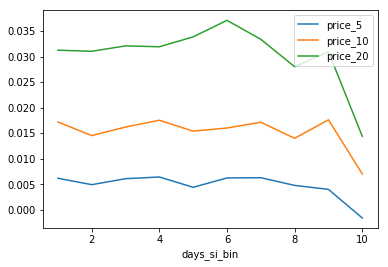

In [11]:
df2.groupby('days_si_bin')[['price_5', 'price_10', 'price_20']].mean().plot()
## lowest decile is 2 days to cover, highest is 87 days to cover
print(df2.groupby('days_si_bin').days_si.mean())

pct_float_bin
1.0      1.475869
2.0      2.241089
3.0      2.851404
4.0      3.613398
5.0      4.648303
6.0      6.167066
7.0      8.225347
8.0     11.327002
9.0     16.477243
10.0    30.627249
Name: pct_float, dtype: float64


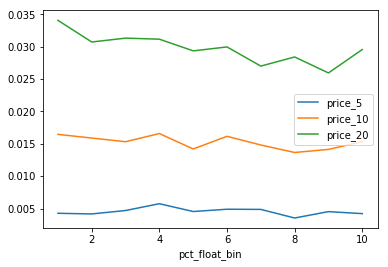

In [12]:
df2.groupby('pct_float_bin')[['price_5', 'price_10', 'price_20']].mean().plot()
## Lowest decile is 1.5% of float, highest is 31% of float
print(df2.groupby('pct_float_bin').pct_float.mean())

### #2 - Stocks with __upward trending short interest__ levels tend to __decline__ in price in the upcoming days and weeks:  FALSE
The trend of short interest can be measured by either (1) percent change in short interest or (2) the ratio of current short interest vs. recent moving average short interest for the same security.  Again, both measurements show generally the opposite of what is predicted by the hypothesis.  Stocks with upward trending short interest generally have more positive returns.  Zero for two...  

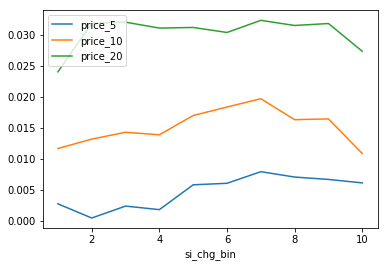

In [13]:
df2.groupby('si_chg_bin')[['price_5', 'price_10', 'price_20']].mean().plot()

si_ratio_bin
1     0.603957
2     0.794540
3     0.869719
4     0.924908
5     0.969911
6     1.005040
7     1.045363
8     1.103453
9     1.188654
10    1.468511
Name: si_ratio, dtype: float64


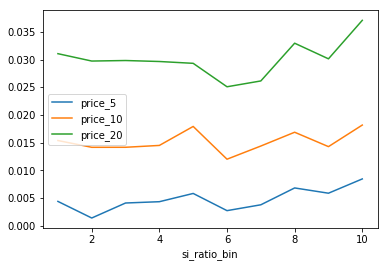

In [14]:
df2.groupby('si_ratio_bin')[['price_5', 'price_10', 'price_20']].mean().plot()
print(df2.groupby('si_ratio_bin').si_ratio.mean())

### #3 - Stocks with __expensive borrow fees__ tend to __rise__ in price (especially if already heavily sold short):  FALSE
Yet again, the hypothesis is not supported by the data.  Stocks with the __lowest__ fee rate (deciles 1,2,3) have the highest returns.  Splitting the data into high short interest vs. low short interest doesn't change the general trend.  

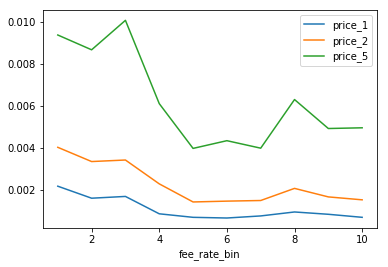

In [15]:
df1.groupby('fee_rate_bin')[['price_1', 'price_2', 'price_5']].mean().plot()

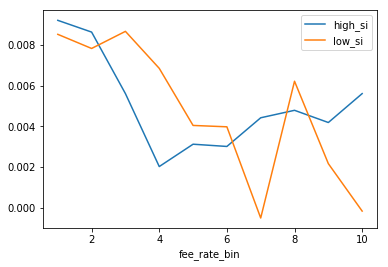

In [16]:
high_si = df3[df3.days_si_bin >= 8].groupby('fee_rate_bin').price_5.mean()
low_si = df3[df3.days_si_bin <= 3].groupby('fee_rate_bin').price_5.mean()
any_si = df3.groupby('fee_rate_bin').price_5.mean()

pd.DataFrame({'high_si': high_si, 'low_si': low_si}).plot()

### #4 - Stocks with __rising borrow fees__ tend to __rise__ in price (especially if already expensive):  FALSE
Again, intuition fails.  Rising borrow fee tend to correlate to worse performance - and this holds true for both cheap and expensive borrows.  

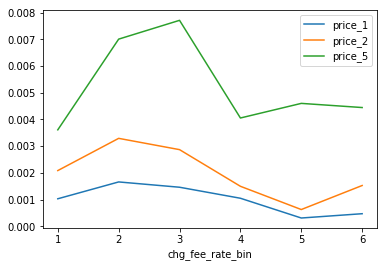

In [17]:
df1.groupby('chg_fee_rate_bin')[['price_1', 'price_2',
                                 'price_5']].mean().plot()

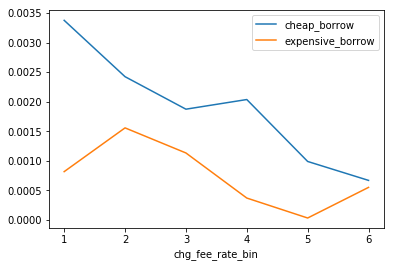

In [18]:
expensive_borrow = df1[df1.fee_rate_bin >= 8].groupby(
    'chg_fee_rate_bin').price_1.mean()
cheap_borrow = df1[df1.fee_rate_bin <= 3].groupby(
    'chg_fee_rate_bin').price_1.mean()

pd.DataFrame({
    'expensive_borrow': expensive_borrow,
    'cheap_borrow': cheap_borrow
}).plot()

### #5 - Stocks with __low borrow availability__ tend to __rise__ in price (especially if already heavily sold short):  TRUE
Finally!  The first chart - future price movement vs. shares available - does not tell much.  It looks as though availability of borrow is a non-factor on future price.  However, when segmenting into highly shorted vs. low short interest stocks, we see a different story.  Those with high short interest do tend to be sensitive to limited availability of shortable shares, as would be the case in a "short squeeze".

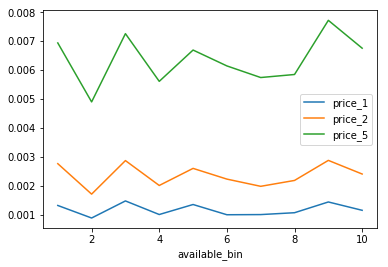

In [19]:
df1.groupby('available_bin')[['price_1', 'price_2', 'price_5']].mean().plot()

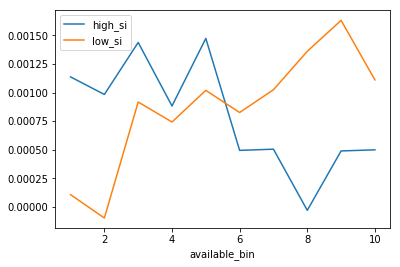

In [20]:
high_si = df3[df3.days_si_bin >= 8].groupby('available_bin').price_1.mean()
low_si = df3[df3.days_si_bin <= 3].groupby('available_bin').price_1.mean()

pd.DataFrame({'high_si': high_si, 'low_si': low_si}).plot()

### #5 - Stocks with __declining or vanished borrow availability__ tend to __rise__ in price (especially if already heavily sold short):  PARTLY TRUE
In one of the strongest relationships we've seen, declining share availability (quantile 1) seems to correlate to future increases in price - a la short squeeze.  However, this trend is actually most pronounced with the lowest short interest stocks. 

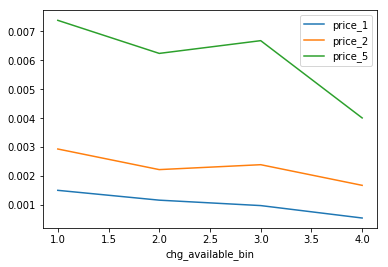

In [21]:
df1.groupby('chg_available_bin')[['price_1', 'price_2',
                                  'price_5']].mean().plot()

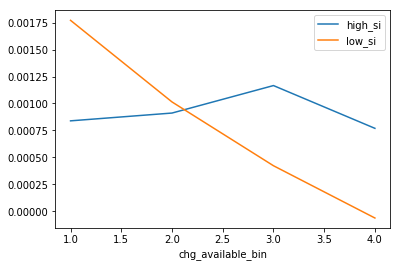

In [22]:
high_si = df3[df3.days_si_bin >= 8].groupby('chg_available_bin').price_1.mean()
low_si = df3[df3.days_si_bin <= 3].groupby('chg_available_bin').price_1.mean()

pd.DataFrame({'high_si': high_si, 'low_si': low_si}).plot()

### Summary and Next Steps
This exercise has generated several useful insights:

* It appears that, generally speaking, the "short sellers are the smart money" school of thinking is correct.  High short interest is an indicator of future price declines.  
* Borrow fees are rationally priced by markets (generally speaking).  Stocks with higher borrow costs tend to underperform.  Stocks with rising borrow costs have worse short term performance.  Whether the difference in borrow costs totally offsets the difference in price change is an open question, but directionally it holds true.  
* There are several non-linearities and conditional relationships / interaction effects which suggest that the right model to use when drawing inference from short-related data is probably something other than linear - tree, ANN, etc... 
* Finally, it's a reminder of why it's important to follow a scientific process and to objectively test assumptions.  Four (and a half) out of six hypotheses I brought into the exercise were not supported - several directly the opposite of what the data shows.  

These datasets appear useful and I plan to do further work on the subject.  Going forward, I'll plan to:
* Validate results on out-of-sample data and to train on longer time periods
* Try to engineer features to capture interaction effects
* Build a simple tree model (random forest?) to get a sense of the usefulness of this data in prediction, then compare the predictions to known factors (momentum, size, value, etc)
* Explore other datasets such as those made available by FINRA

I welcome any comments, suggestions, questions, or resources in the discussion thread below!

### One last thing...
If you've found this post helpful, please consider subscribing to the email list to be notified of future posts (email addresses will only be used for this purpose...).  

You can also follow me on [twitter](https://twitter.com/data2alpha) and forward to a friend or colleague who may find this topic interesting.  